In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/MyDrive/nlp/case_study/"

/content/gdrive/MyDrive/nlp/case_study


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_excel('Product_Review_Case_Study_Data_Excel.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/nlp_case_Study/data/Product_Review_Case_Study_Data_Excel.xlsx'

In [5]:
df['review'] = df['review'].fillna(0)

Remove emoji

In [6]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

df["review_remove_emoji"] = df["review"].apply(lambda text: remove_emoji(str(text)))
df["remove_emoji_ind"]= df.apply(lambda text:1 if text['review_remove_emoji']!=text['review'] else 0, axis=1)

convert lower case

In [7]:
df["review"] = df["review"].str.lower()

In [19]:
df['review'] =  df["review"].apply( lambda row: str(row).replace("[this review was collected as part of a promotion.]", "" ))

In [20]:
df['review'][2]

' sub brand 3 segment a food was definitely well received by my 4 cats. they licked their plates clean!'

Remove punctuation

In [41]:
def special_char(text):
    chars = re.findall(r"[^\w. ]", text)
    return chars


df["review"] = df["review"].apply(special_char)

TypeError: ignored

In [9]:
df['review'][2]

'[this review was collected as part of a promotion.] sub brand 3 segment a food was definitely well received by my 4 cats. they licked their plates clean!'

Remove Duplication 

In [12]:
#get duplicate records 
df2 = df[df['review'].duplicated() == True]
df2.head(1)

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,...,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_remove_emoji,remove_emoji_ind
629,UPC 63,Manufacturer F,Brand 18,Sub Brand 34,Category 2,Segment B,"i feed both my dogs the mobility, my great dan...",Great stuff,5,Chewy,...,19448,Competitor,15.5 Pound,Chicken,Not Applicable,Adult,Super Premium,2022-04-10,"I feed both my dogs the mobility, my Great Dan...",0


In [13]:
df['review_count'] = df['review'].str.split().str.len()

In [14]:
df['review_count'].unique()

array([  2.,  23.,  28.,  34., 133.,  17.,  12.,  30.,  55.,  19.,  37.,
        29.,  36.,  43.,  27.,  14.,  32.,  51.,  25.,   6.,  59.,   5.,
        16.,  60.,  45.,  11., 293., 151.,  65., 136.,  15.,  33.,  44.,
        79., 137.,  26.,  42.,  71.,  31.,  18.,  57.,  24.,  64., 105.,
        21., 108.,  22.,  73.,  13.,  74.,   7.,  20.,  35.,  49.,  90.,
        40.,  56.,  10.,  54.,  38.,  47.,  41.,  61.,   8.,  97., 144.,
        62., 153.,   4.,  48.,  87.,  82.,  52.,  39.,  69.,  72.,  66.,
        78.,   9.,  80.,  98.,  76.,  46.,  53.,  67.,  89.,  86., 294.,
        50.,  58., 283.,   3.,  68.,  92., 121., 166., 184., 299.,  93.,
        84.,  63., 158.,  75.,  77.,  83., 125., 127., 110., 111., 117.,
       267.,  96., 131., 319., 140.,   1., 304.,  95., 101.,  81., 206.,
       152.,  70.,  85., 115., 143., 116., 104., 291., 102., 112., 128.,
       340., 352., 123.,  94., 103., 106., 173., 122., 169., 114., 244.,
       271.,  91., 129.,  99., 318., 378., 119., 18

<AxesSubplot:ylabel='Frequency'>

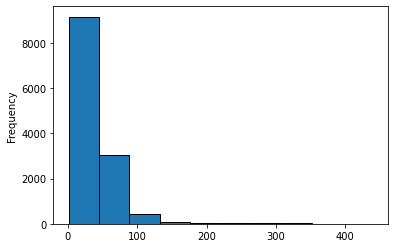

In [15]:
df['review_count'].plot(kind='hist',edgecolor='black')

In [16]:
df_g = df.groupby(['upc']).agg({"product_id": lambda x: x.nunique()})

In [43]:
df1 = df.groupby("review_id")[["review_id"]].count().rename(columns={"review_id":"review_count"}).reset_index().sort_values(by="review_count")

In [44]:
df1.head()

,review_id,review_count
3594,7b775942624f55d71e79e525d4b1891d,1
4327,9774dc6d3dd68173d855430909dc4b52,1
4326,975a9d76a3cc6b98df140b4b82eadc47,1
4323,97464e751354a65d725f9509a7296139,1
4321,972da1eca36341226ef7933a0e2ca42f,1


In [17]:
df_g[df_g['product_id']>=2].count()

product_id    60
dtype: int64

In [18]:
df[df['upc']=='UPC 103'].head(5)

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,...,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_remove_emoji,remove_emoji_ind,review_count
364,UPC 103,Manufacturer C,Brand 13,Sub Brand 15,Category 2,Segment D,i have an unbelievably picky dog and he loves ...,Great treats,5,Amazon,...,Competitor,13 Ounce,Nut,Not Applicable,Adult,Not Applicable,2022-04-10,I have an unbelievably picky dog and he loves ...,0,10.0
874,UPC 103,Manufacturer C,Brand 13,Sub Brand 15,Category 2,Segment D,my pup loves them. they look like oreos👍😍,Great buy,5,Amazon,...,Competitor,13 Ounce,Nut,Not Applicable,Adult,Not Applicable,2022-04-10,My pup loves them. They look like Oreos,1,8.0
889,UPC 103,Manufacturer C,Brand 13,Sub Brand 15,Category 2,Segment D,my dogs love these cookies! i feel i will alwa...,Dogs love,5,Amazon,...,Competitor,13 Ounce,Nut,Not Applicable,Adult,Not Applicable,2022-04-10,My dogs love these cookies! I feel I will alwa...,0,16.0
5058,UPC 103,Manufacturer C,Brand 13,Sub Brand 15,Category 2,Segment D,the product is great. my cat loves it. problem...,Don’t buy from this seller,1,Amazon,...,Competitor,13 Ounce,Nut,Not Applicable,Adult,Not Applicable,2022-04-10,The product is great. My cat loves it. Problem...,0,31.0
9631,UPC 103,Manufacturer C,Brand 13,Sub Brand 15,Category 2,Segment D,we have a small house. our litter box is share...,What smell?,5,Chewy,...,Competitor,13 Ounce,Nut,Not Applicable,Adult,Not Applicable,2022-04-10,We have a small house. Our litter box is share...,0,26.0


In [19]:
df_j = df.groupby(['product_id']).agg("count")

In [20]:
df_j.head(5)

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,...,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_remove_emoji,remove_emoji_ind,review_count
product_id,,,,,,,,,,,,,,,,,,,,,
10981,1,1,1,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,0
10988,1,1,1,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,0
10990,4,4,4,4,4,4,0,0,4,4,...,4,4,4,4,4,4,4,4,4,0
12034,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
12037,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [21]:
df.groupby(['upc']).agg({"vendor": lambda x: x.nunique()}).head(5)

,vendor
upc,
UPC 1,1
UPC 10,1
UPC 100,1
UPC 1000,1
UPC 1001,1


In [22]:
df.groupby(['upc']).agg({"brand": lambda x: x.nunique()}).head(5)

,brand
upc,
UPC 1,1
UPC 10,1
UPC 100,1
UPC 1000,1
UPC 1001,1


In [23]:
df.groupby(['upc']).agg({"sub_brand": lambda x: x.nunique()}).head(5)

,sub_brand
upc,
UPC 1,1
UPC 10,1
UPC 100,1
UPC 1000,1
UPC 1001,1


In [24]:
len(pd.unique(df.product_id))

1385

In [25]:
len(pd.unique(df.upc))

1323

Remove stop words

In [26]:
import spacy
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [27]:
def remove_stops(doc) -> list:
    # Filter out stop words by using the `token.is_stop` attribute
    return [token.text for token in nlp(doc) if not token.is_stop]

In [28]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

df['review1'] = df['review'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))


In [29]:
df['review1'][:3]

0                                             cat died
1    cat picky really enjoys fancy feast flavor. he...
2    [this review collected promotion.] sub brand 3...
Name: review1, dtype: object

In [30]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
df['review_ner'] = df['review1'].apply(lambda sent: [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in nlp(sent).ents])  

In [31]:
df['review_ner'][:5]

0                                                   []
1                                                   []
2       [(3, 45, 46, CARDINAL), (4, 80, 81, CARDINAL)]
3                                                   []
4    [(vet spent dollars, 94, 111, ORG), (4, 340, 3...
Name: review_ner, dtype: object

Comparison of Pre and Post Processing

In [32]:
def freq_word(x, terms=30):
    all_words = " ".join([str(word).lower() for word in x])

    all_words = all_words.split()
    all_words = [x for x in all_words]

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({"word": list(fdist.keys()), "count": list(fdist.values())})

    # displaying top 20 frequent words
    d = words_df.nlargest(columns="count", n=25)
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(data=d, x="word", y="count")
    ax.set(ylabel="Count")
    plt.show()

    return fdist

Word Frequency distribution before text cleaning

In [33]:
from nltk import FreqDist
import seaborn as sns

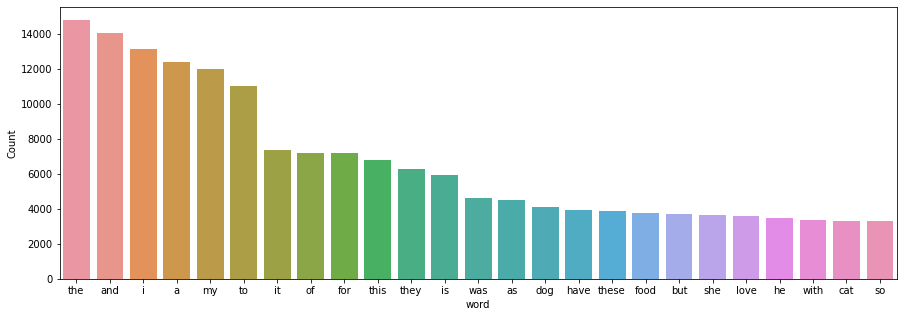

In [34]:
fdist = freq_word(df["review"])

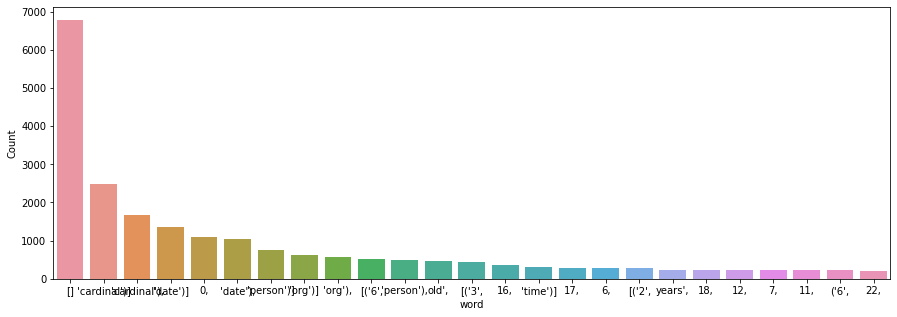

In [35]:
fdist = freq_word(df["review_ner"])

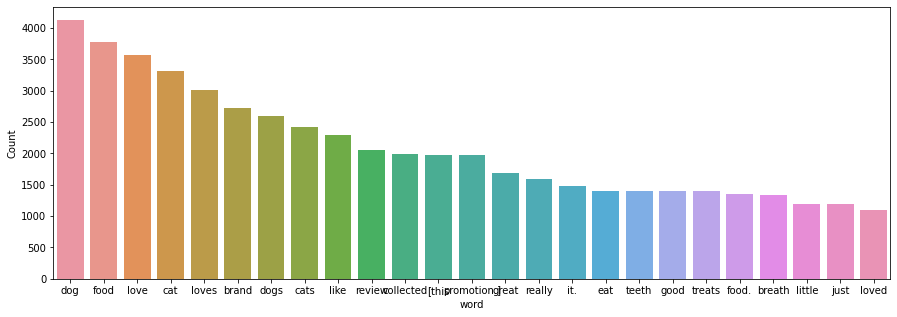

In [36]:
fdist = freq_word(df["review1"])

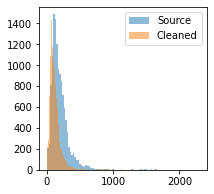

In [37]:
length_comp = plt.figure(figsize=(3, 3))
plt.hist(df["review"].str.len(), 100, alpha=0.5, label="Source")
plt.hist(df["review1"].str.len(), 100, alpha=0.5, label="Cleaned")
plt.legend(loc="upper right")
plt.show()

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 

In [70]:
#top n gram

In [46]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['review1'], 20)
for word, freq in common_words:
    print(word, freq)

food 5913
dog 4613
cat 3641
love 3607
dogs 3078
loves 3036
brand 2962
cats 2898
treats 2391
like 2389
great 2008
teeth 1864
breath 1777
eat 1655
really 1604
good 1603
product 1542
treat 1271
little 1216
just 1190


In [71]:
#bigram

In [47]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['review1'], 20)
for word, freq in common_words:
    print(word, freq)

dog loves 750
dog food 721
dogs love 608
cat food 606
cats love 541
cat loves 389
wet food 334
highly recommend 314
dry food 305
teeth clean 253
loves food 250
loves brand 248
sub brand 243
loves treats 235
definitely recommend 227
brand 17 221
segment food 215
love brand 215
absolutely loves 212
love food 210


In [73]:
#trigram

In [48]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['review1'], 20)
for word, freq in common_words:
    print(word, freq)


wet cat food 168
sub brand segment 123
brand segment food 121
meow mix simple 85
simple servings wet 70
mix simple servings 70
cat loves treats 67
servings wet cat 66
dog loves treats 64
dog loves food 63
dog loves brand 63
dogs love treats 56
dogs teeth clean 56
make breath smell 55
dog absolutely loves 55
cats love treats 54
teeth clean breath 53
dogs absolutely love 51
cats love food 50
simple servings segment 49


In [54]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [47]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [49]:
def lemma_text(text):
    doc = nlp(text)
    
    lemma_words = []
    for token in doc:
        lemma_words.append(token.lemma_)
        
    return lemma_words

df['review_lemmatized'] = df['review1'].apply(lemma_text)

In [55]:
final_text = " "
for text in df["review1"]:
    final_text = final_text+ " "+ text

In [56]:
nlp.max_length = 4000000
doc_review = nlp(final_text)
POS_counts = doc_review.count_by(spacy.attrs.POS)
POS_counts

{103: 25,
 92: 90311,
 100: 53191,
 96: 11926,
 86: 15885,
 84: 35829,
 97: 52662,
 95: 11311,
 101: 2395,
 90: 2150,
 93: 6100,
 87: 8926,
 94: 4601,
 89: 720,
 85: 3002,
 91: 555,
 99: 545,
 98: 417}

NMF

In [63]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
!python -m pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=e7e6c7f852dcccc0f4fb9f6569cd0f927644fb061cca84bd1efe44d59525e799
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=b1f2dcd4fbbac29eec73e7669e5962f046ee0e99acaa3aa411d29c0a215ac47d
  Stored in directory: /root/.cache/pip/wheels/ba/d9/a0/ddd93af16d5855dd9bad417623e70948fdac119d1d34fb17c8
Successfully built fst-pso miniful
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0

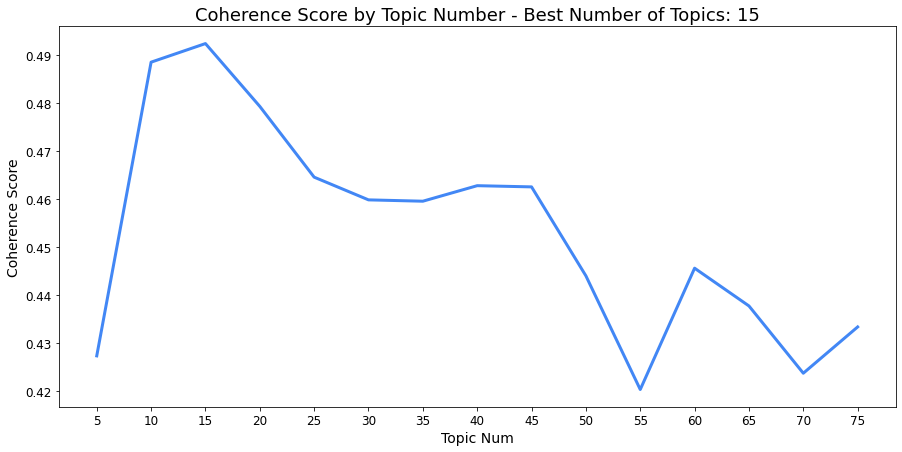

In [67]:

# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['review_lemmatized']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)



plt.show()

In [72]:
# Now use the number of topics with the 
# highest coherence score to run the 
# sklearn nmf model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
texts = df['review_lemmatized']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names_out()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [80]:
def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


In [82]:
def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]  

In [85]:
def whitespace_tokenizer(text): 
    pattern = r"(?u)\b\w\w+\b" 
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens


In [86]:
# Funtion to remove duplicate words
def unique_words(text): 
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist

In [88]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

from nltk.tokenize import TweetTokenizer, RegexpTokenizer

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 8

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()

,0,1,2,3,4,5,6,7,topics
0,dog love,dog,love,dog food,love dog,love these,love food,these,dog love food these
1,this,review,promotion,collect promotion,this review,review collect,collect,promotion cat,this review promotion collect cat
2,wet,cat food,cat,simple,meow,serving,meow mix,simple serving,wet cat food simple meow serving mix
3,cat,cat love,love,flavor,run,come,come run,love it,cat love flavor run come it
4,food,eat,dog food,love food,dog,dry,year,old,food eat dog love dry year old


In [89]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df.head()

,topic_num,topics
0,0,dog love food these
1,1,this review promotion collect cat
2,2,wet cat food simple meow serving mix
3,3,cat love flavor run come it
4,4,food eat dog love dry year old
